This notebook creates all the figures in the manuscript.
In order to run it, it will be necessary to already have run the script 'simulations.py' for all the parameter sets and have their csv products in the same folder

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from rev_lib import *

Initiate parameters

In [2]:
def get_confidence(y):
    y = np.array(y)
    yt = y.transpose()
    
    mean= np.mean(y,axis=0) 
    under95 = [np.percentile(d,2.5) for d in yt]
    under50 = [np.percentile(d,25) for d in yt]
    median  = [np.percentile(d,50) for d in yt]
    upper50 = [np.percentile(d,75) for d in yt]
    upper95 = [np.percentile(d,97.5) for d in yt]
    return mean,under95,under50,median,upper50,upper95
    

def plot_confidence(ax,mean,under95,under50,median,upper50,upper95,label=True,color='b'):
    x = np.arange(mean.size)
    if label:
        ax.plot(mean,color='r',label='Mean')
        ax.plot(median,color='k',label='Median')
        ax.fill_between(x,under95,under50,color=color,alpha=.25, label = '95% Credible interval')
        ax.fill_between(x,under50,upper50,color=color,alpha=.5,label = '50% Credible interval')
        ax.fill_between(x,upper50,upper95,color=color,alpha=.25)
    else:
        ax.plot(mean,color='r')
        ax.plot(median,color='k')
        ax.fill_between(x,under95,under50,color=color,alpha=.25)
        ax.fill_between(x,under50,upper50,color=color,alpha=.5)
        ax.fill_between(x,upper50,upper95,color=color,alpha=.25)

**SI - B**

In [3]:
c_pas = [params(10,5,3,'c'), #cynical model
         params(10,7,3,'c'), #cynical with 7 friends
         params(10,9,3,'c')] #cynical with 9 friends
q_pas = [params(10,5,3,'q'), #quality model
         params(10,7,3,'q'), #quality with 7 friends
         params(10,9,3,'q')] #quality with 9 friends

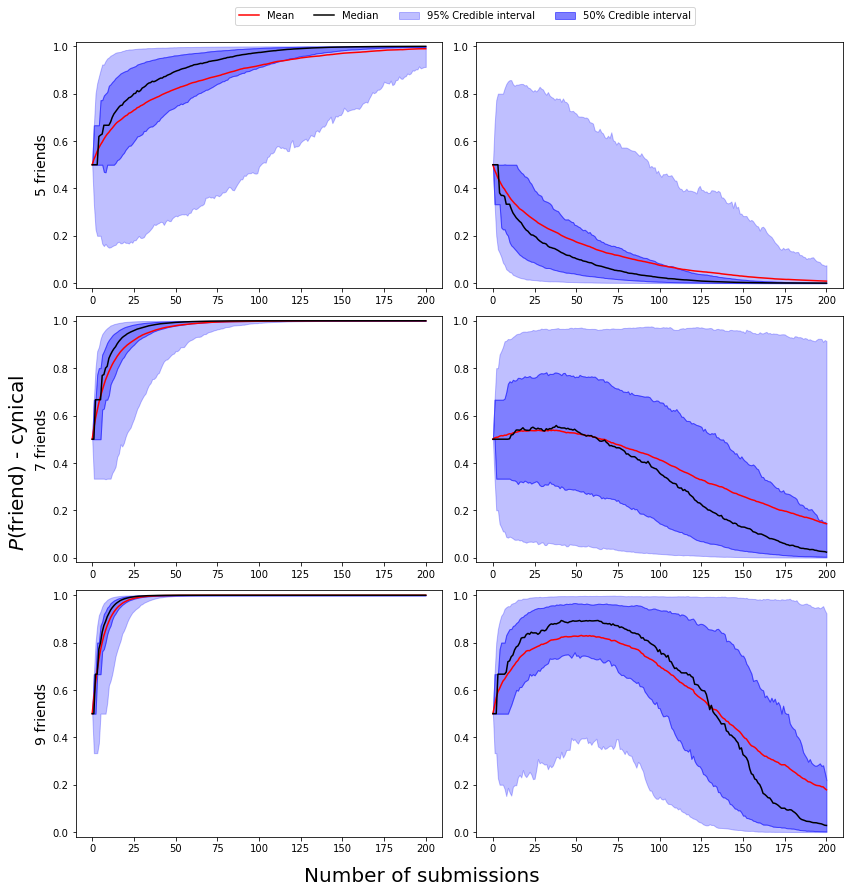

In [4]:
fig,ax=plt.subplots(3,2,figsize=(12,12))

label_mark = True
for (axi,gl) in zip(ax,c_pas):
    rho_cf = pd.read_csv('rho_friend_{}.csv'.format(gl.suffix))
    plot_confidence(axi[0],*get_confidence(rho_cf),label=label_mark)
    axi[0].set_ylim([-.02,1.02])
    
    label_mark=False

    rho_cr = pd.read_csv('rho_rival_{}.csv'.format(gl.suffix))
    plot_confidence(axi[1],*get_confidence(rho_cr),label=label_mark)
    axi[1].set_ylim([-.02,1.02])
    
    axi[0].set_ylabel(r'{} friends'.format(gl.ground.sum()),size=14)
    
fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'$P($friend$)$ - {}'.format(gl.model_name),size=20)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('rho_different_friends_{}.png'.format(gl.model_name),dpi=300,bbox_inches="tight")

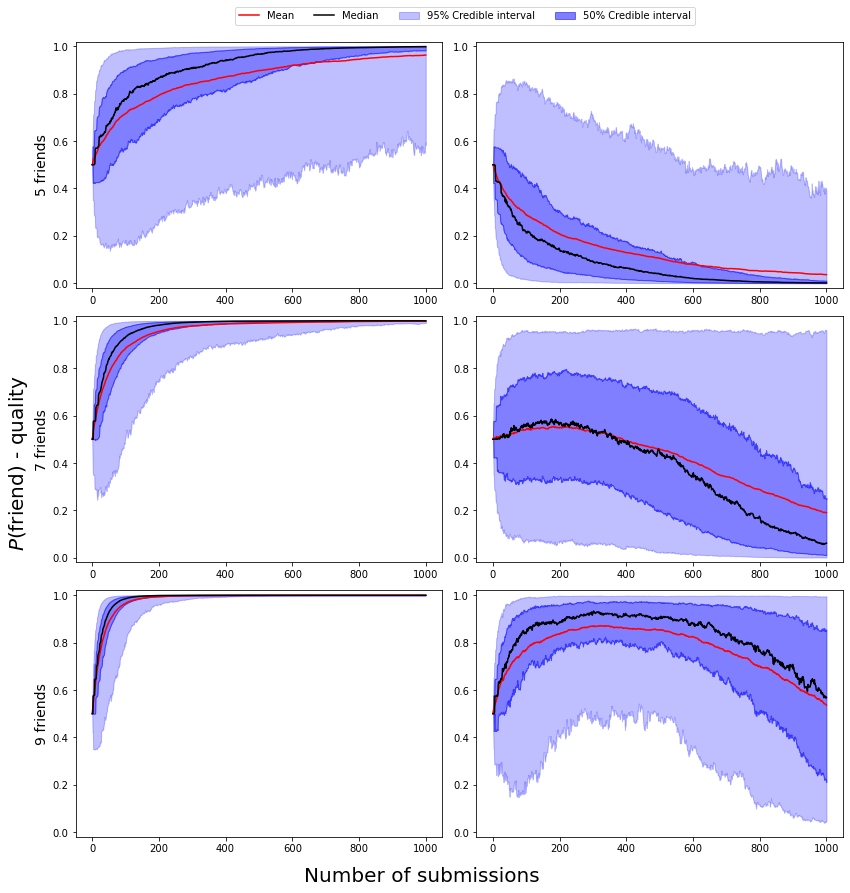

In [5]:
fig,ax=plt.subplots(3,2,figsize=(12,12))

label_mark = True
for (axi,gl) in zip(ax,q_pas):
    rho_cf = pd.read_csv('rho_friend_{}.csv'.format(gl.suffix))
    plot_confidence(axi[0],*get_confidence(rho_cf),label=label_mark)
    axi[0].set_ylim([-.02,1.02])
    
    label_mark=False

    rho_cr = pd.read_csv('rho_rival_{}.csv'.format(gl.suffix))
    plot_confidence(axi[1],*get_confidence(rho_cr),label=label_mark)
    axi[1].set_ylim([-.02,1.02])
    
    axi[0].set_ylabel(r'{} friends'.format(gl.ground.sum()),size=14)

fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'$P($friend$)$ - {}'.format(gl.model_name),size=20)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('rho_different_friends_{}.png'.format(gl.model_name),dpi=300,bbox_inches="tight")

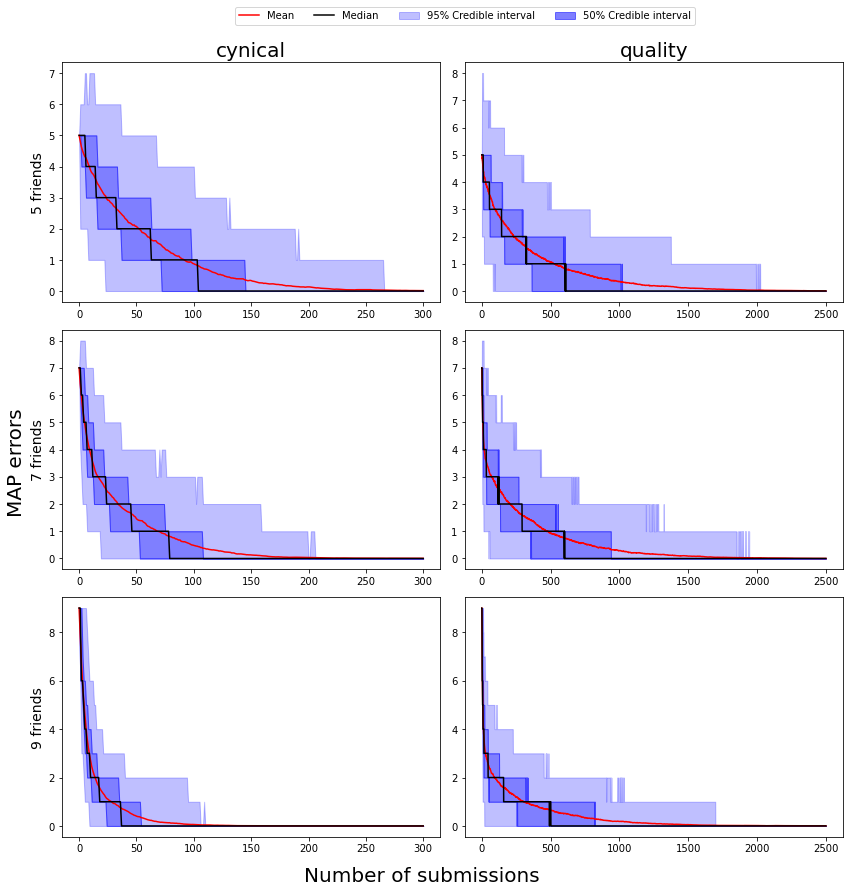

In [6]:
fig,ax=plt.subplots(3,2,figsize=(12,12))

label_mark = True
for (axi,glc,glq) in zip(ax,c_pas,q_pas):
    mpc = pd.read_csv('map_{}.csv'.format(glc.suffix))
    plot_confidence(axi[0],*get_confidence(mpc),label=label_mark)
    
    label_mark = False

    mpq = pd.read_csv('map_{}.csv'.format(glq.suffix))
    plot_confidence(axi[1],*get_confidence(mpq),label=label_mark)

    axi[0].set_ylabel(r'{} friends'.format(glc.ground.sum()),size=14)
    
for (axi,name) in zip(ax[0],['cynical','quality']):
    axi.set_title('{}'.format(name),size=20)

fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'MAP errors',size=20)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('map_different_friends.png',dpi=300,bbox_inches="tight")

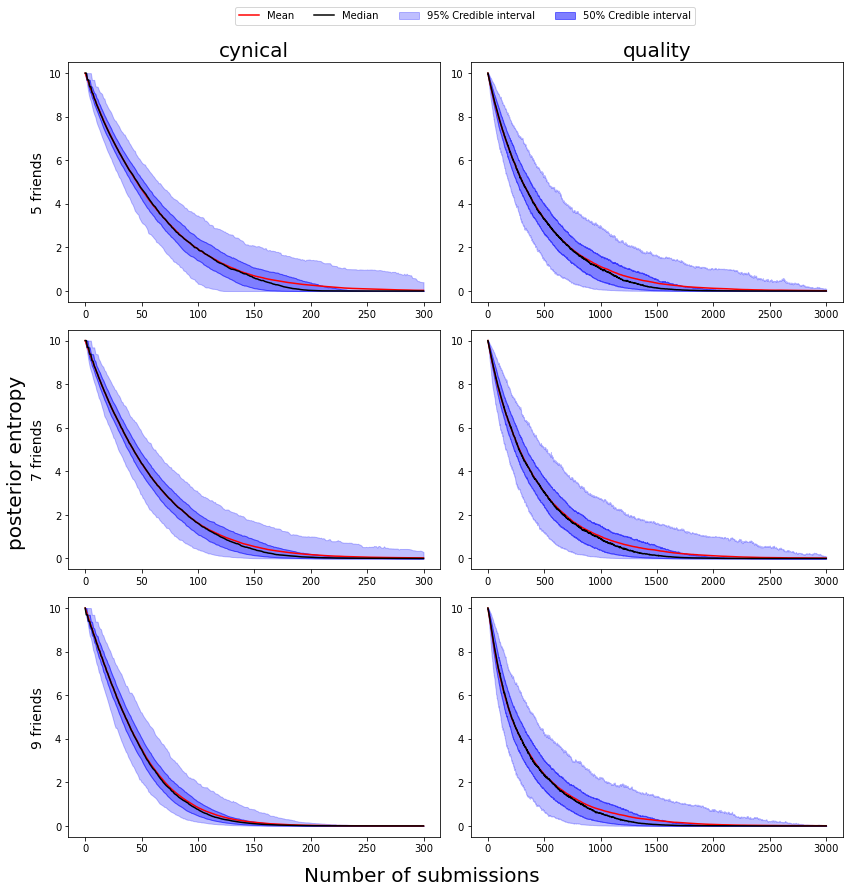

In [7]:
fig,ax=plt.subplots(3,2,figsize=(12,12))

label_mark = True
for (axi,glc,glq) in zip(ax,c_pas,q_pas):
    Sc = pd.read_csv('entropy_{}.csv'.format(glc.suffix))
    plot_confidence(axi[0],*get_confidence(Sc),label=label_mark)
    
    label_mark = False

    Sq = pd.read_csv('entropy_{}.csv'.format(glq.suffix))
    plot_confidence(axi[1],*get_confidence(Sq),label=label_mark)

    axi[0].set_ylabel(r'{} friends'.format(glc.ground.sum()),size=14)
    
for (axi,name) in zip(ax[0],['cynical','quality']):
    axi.set_title('{}'.format(name),size=20)
    
fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'posterior entropy',size=20)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('entropy_different_friends.png',dpi=300,bbox_inches="tight")

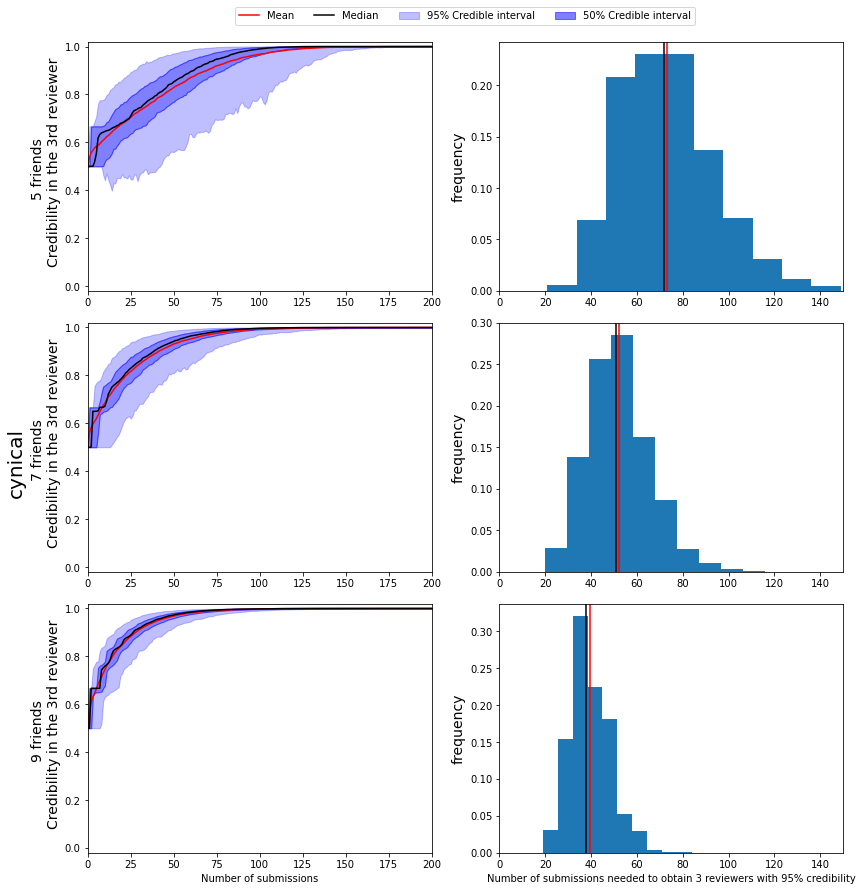

In [8]:
fig,ax=plt.subplots(3,2,figsize=(12,12))

label_mark = True
for (axi,gl) in zip(ax,c_pas):
    prob3 = pd.read_csv('prob3_{}.csv'.format(gl.suffix)).to_numpy()
    
    plot_confidence(axi[0],*get_confidence(prob3),label=label_mark)
    axi[0].set_ylim([-.02,1.02])
    
    axi[0].set_xlim([0,200])
    axi[0].set_ylabel('{} friends \n  Credibility in the 3rd reviewer'.format(gl.ground.sum()),size=14)
    
    label_mark = False
    
    dferr = pd.read_csv('prob3_errors_{}.csv'.format(gl.suffix))
    p3nums = dferr['number'].to_numpy()
    
    axi[1].hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
    axi[1].axvline(np.median(p3nums),color='k')
    axi[1].axvline(np.mean(p3nums),color='r') 
    axi[1].set_ylabel(r'frequency',size=14)
    axi[1].set_xlim(0,150)
    
ax[-1][0].set_xlabel('Number of submissions')
ax[-1][1].set_xlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility')   
    
fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'{}'.format(gl.model_name),size=20)
#fig.supxlabel('Number of submissions'.format(gl.model_name),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('p3_different_friends_{}.png'.format(gl.model_name),dpi=300,bbox_inches="tight")

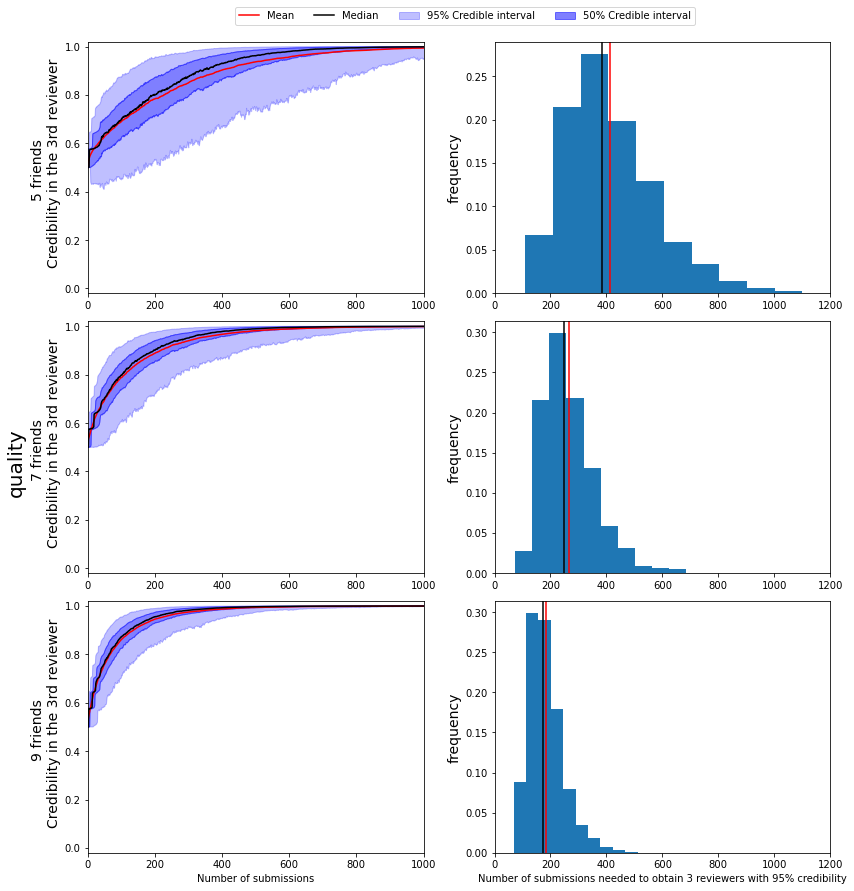

In [9]:
fig,ax=plt.subplots(3,2,figsize=(12,12))

label_mark = True
for (axi,gl) in zip(ax,q_pas):
    prob3 = pd.read_csv('prob3_{}.csv'.format(gl.suffix)).to_numpy()
    
    plot_confidence(axi[0],*get_confidence(prob3),label=label_mark)
    axi[0].set_ylim([-.02,1.02])
    
    axi[0].set_xlim([0,1000])
    axi[0].set_ylabel('{} friends \n  Credibility in the 3rd reviewer'.format(gl.ground.sum()),size=14)
    
    label_mark = False
    #axi[0].set_ylabel(r'Credibility in the class of the 3rd reviewer- {}'.format(gl.model_name))
    #axi[0].set_xlabel('Number of submissions')
    
    dferr = pd.read_csv('prob3_errors_{}.csv'.format(gl.suffix))
    p3nums = dferr['number'].to_numpy()
    
    axi[1].hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
    axi[1].axvline(np.median(p3nums),color='k')
    axi[1].axvline(np.mean(p3nums),color='r')
    axi[1].set_ylabel(r'frequency',size=14)
    axi[1].set_xlim(0,1200)
    
ax[-1][0].set_xlabel('Number of submissions')
ax[-1][1].set_xlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility')   
    
fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'{}'.format(gl.model_name),size=20)
#fig.supxlabel('Number of submissions'.format(gl.model_name),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('p3_different_friends_{}.png'.format(gl.model_name),dpi=300,bbox_inches="tight")

**SI - D**

In [10]:
q_tables = [[params(10,5,3,'q',.6875,2.0625),params(10,5,3,'q',4.4375,13.3125),params(10,5,3,'q',9.125,27.375)],
            [params(10,5,3,'q',2,2),         params(10,5,3,'q'),               params(10,5,3,'q',24.5,24.5)   ],
            [params(10,5,3,'q',2.0625,.6875),params(10,5,3,'q',13.3125,4.4375),params(10,5,3,'q',27.375,9.125)]]
cols = [.05,.01,.005]
rows = [.25,.5,.75]

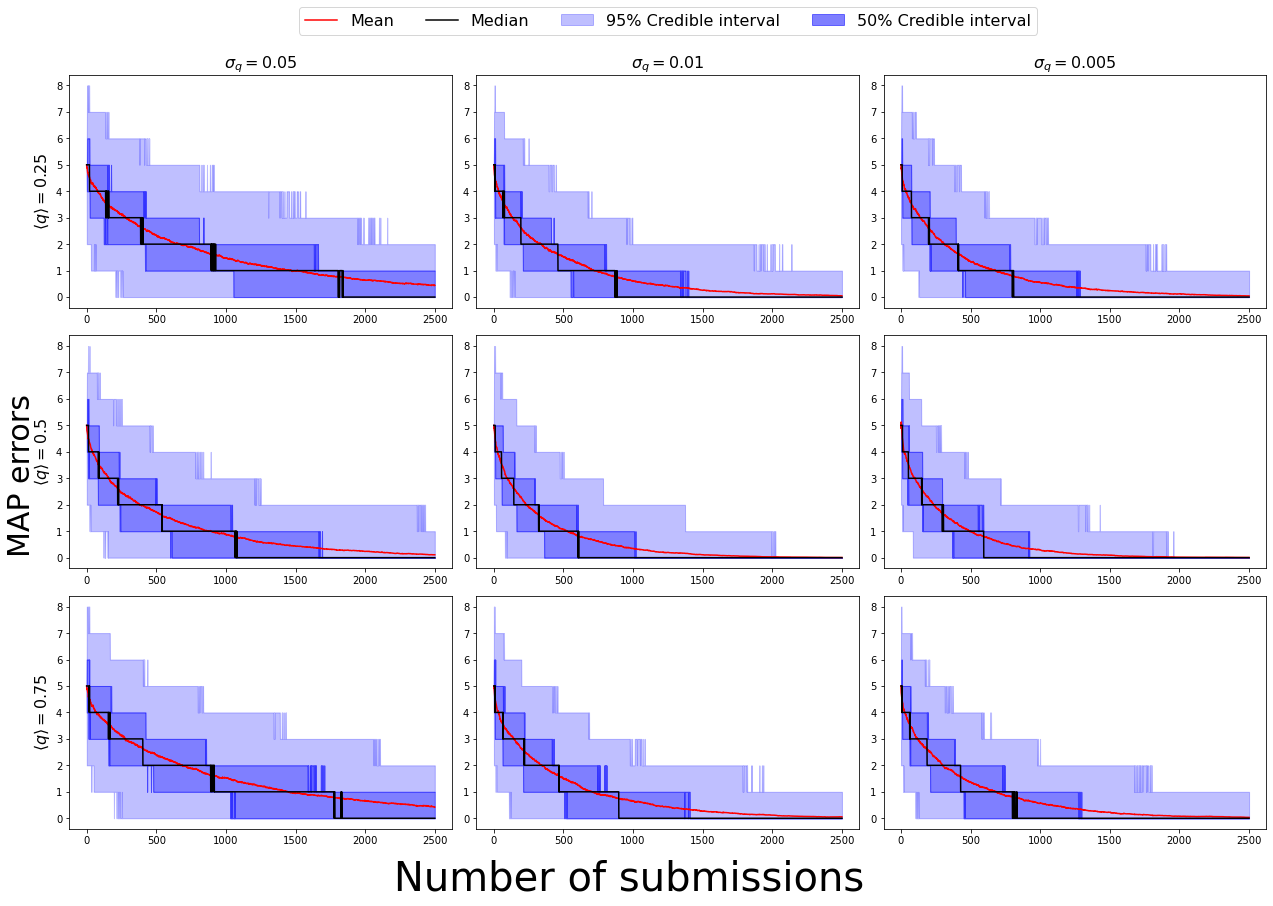

In [11]:
fig,ax=plt.subplots(3,3,figsize=(6*3,4*3))

label_mark=True
for (row,axi,gl_line) in zip(rows,ax,q_tables):
    for (axj,gl) in zip(axi,gl_line):
        mp = pd.read_csv('map_{}.csv'.format(gl.suffix))
        plot_confidence(axj,*get_confidence(mp),label=label_mark)
        label_mark = False
    axi[0].set_ylabel(r'$\langle q \rangle={}$'.format(row),size=16)
for (col,axi,gl) in zip(cols,ax[0],q_tables[0]):
    axi.set_title(r'$\sigma_q={}$'.format(col),size=16)

fig.legend(loc=8,ncol=4,bbox_to_anchor=(.53,1.001),fontsize=16)
fig.supylabel(r'MAP errors'.format(gl.model_name),size=30)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=40)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('map_different_qualities.png',dpi=150,bbox_inches="tight")

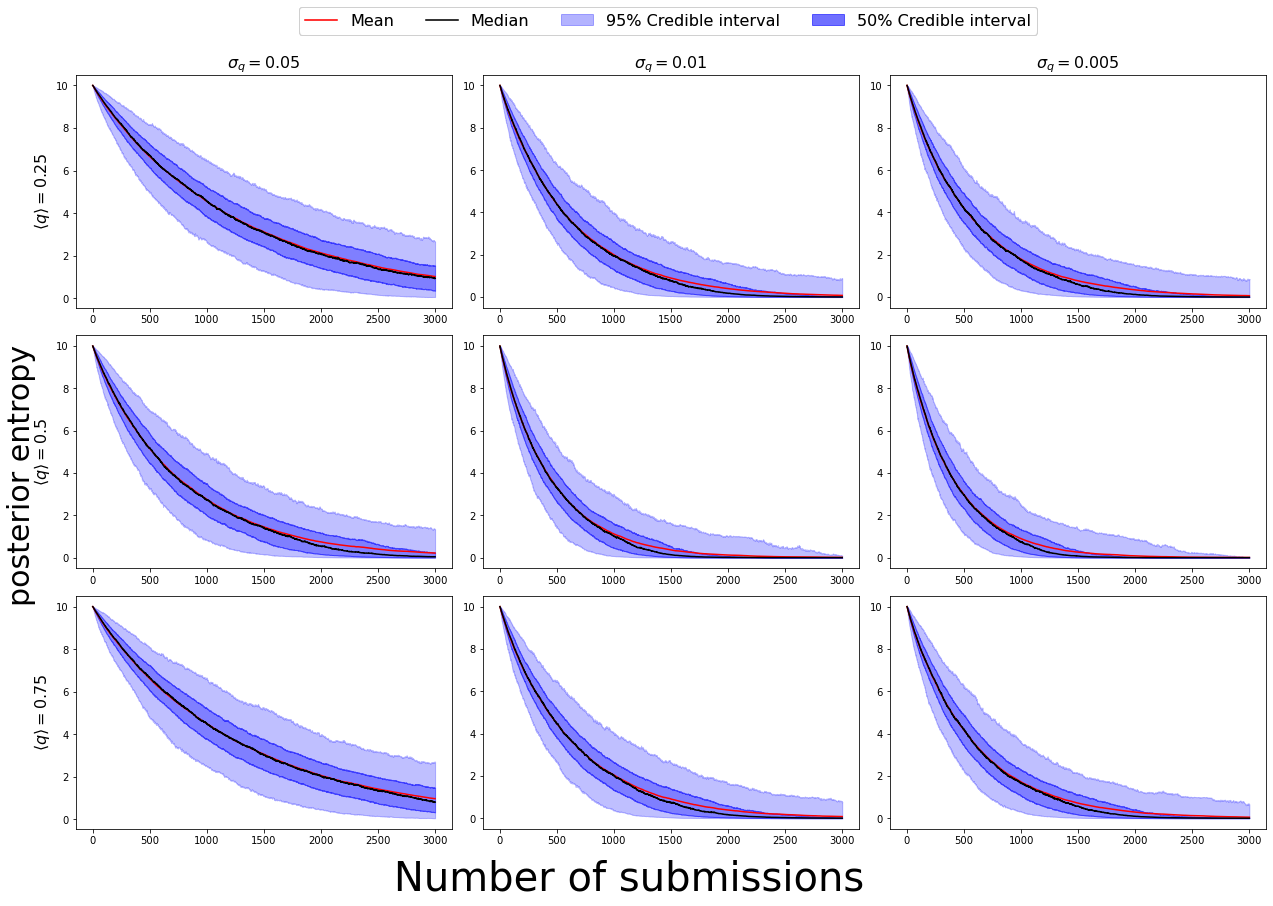

In [12]:
fig,ax=plt.subplots(3,3,figsize=(6*3,4*3))

label_mark=True
for (row,axi,gl_line) in zip(rows,ax,q_tables):
    for (axj,gl) in zip(axi,gl_line):
        S = pd.read_csv('entropy_{}.csv'.format(gl.suffix))
        plot_confidence(axj,*get_confidence(S),label=label_mark)
        label_mark = False
    axi[0].set_ylabel(r'$\langle q \rangle={}$'.format(row),size=16)
for (col,axi,gl) in zip(cols,ax[0],q_tables[0]):
    axi.set_title(r'$\sigma_q={}$'.format(col),size=16)

    fig.legend(loc=8,ncol=4,bbox_to_anchor=(.53,1.001),fontsize=16)
fig.supylabel(r'posterior entropy'.format(gl.model_name),size=30)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=40)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('entropy_different_qualities.png',dpi=150,bbox_inches="tight")

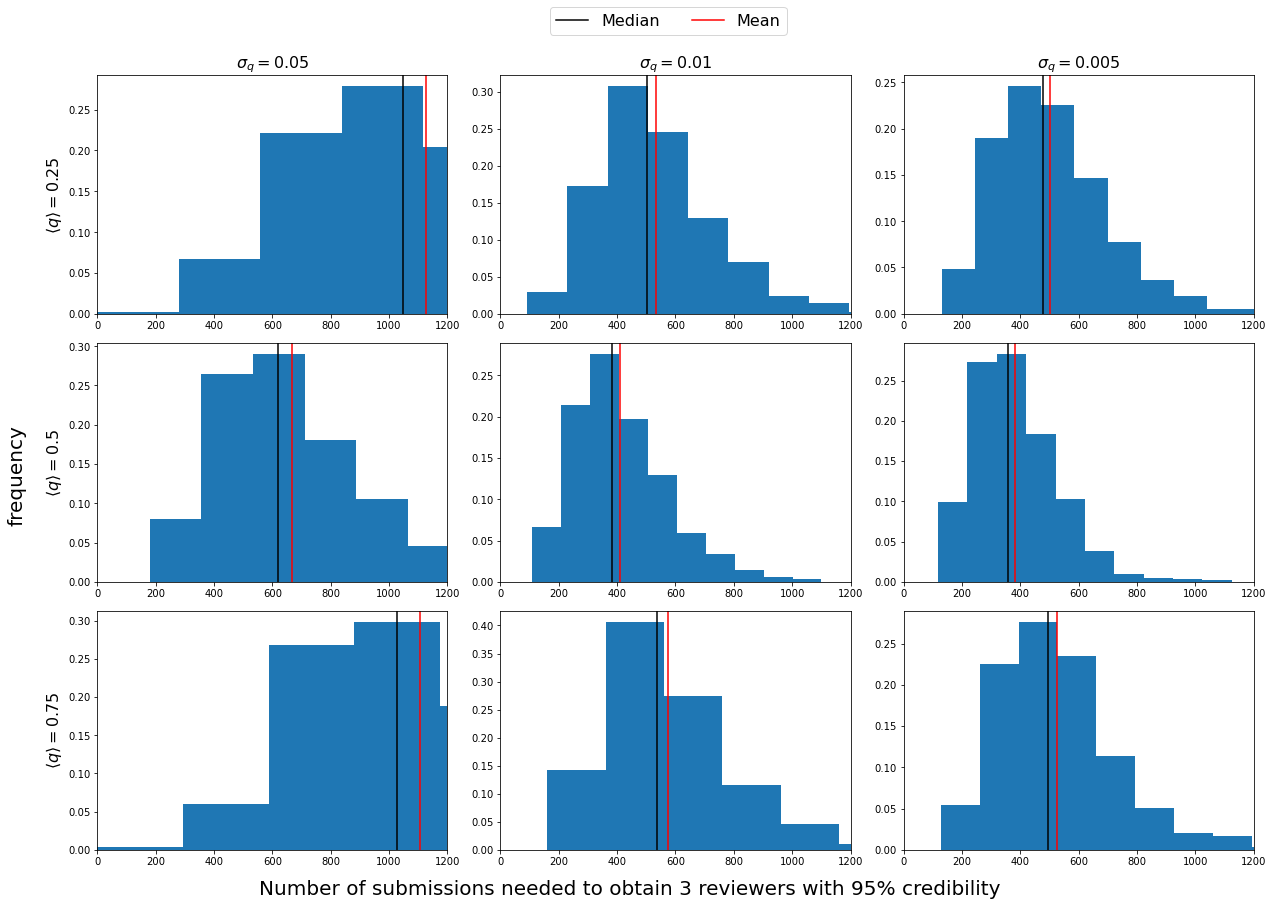

In [13]:
fig,ax=plt.subplots(3,3,figsize=(6*3,4*3))

label_mark=True
for (row,axi,gl_line) in zip(rows,ax,q_tables):
    for (axj,gl) in zip(axi,gl_line):
        #arr=7
        dferr = pd.read_csv('prob3_errors_{}.csv'.format(gl.suffix))
        p3nums = dferr['number'].to_numpy()
    
        axj.hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
        if label_mark:
            axj.axvline(np.median(p3nums),color='k',label='Median')
            axj.axvline(np.mean(p3nums),color='r',label='Mean')            
        else:
            axj.axvline(np.median(p3nums),color='k')
            axj.axvline(np.mean(p3nums),color='r')
        label_mark=False
        axj.set_xlim(0,1200)
    axi[0].set_ylabel(r'$\langle q \rangle={}$'.format(row),size=16)
        
for (col,axi,gl) in zip(cols,ax[0],q_tables[0]):
    axi.set_title(r'$\sigma_q={}$'.format(col),size=16)

fig.legend(loc=8,ncol=4,bbox_to_anchor=(.53,1.001),fontsize=16)
fig.supylabel('frequency\n '.format(gl.model_name),size=20)
fig.supxlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility'.format(gl.model_name),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('p3_different_qualities.png',dpi=150,bbox_inches="tight")

In [14]:
del_tables = [[params(10,5,3,'q',4.4375,13.3125),params(10,5,3,'q',1,3,delta=True)],
              [params(10,5,3,'q'),               params(10,5,3,'q',1,1,delta=True)],
              [params(10,5,3,'q',13.3125,4.4375),params(10,5,3,'q',3,1,delta=True)]]
del_cols = [.01,0]
del_rows = [.25,.5,.75]

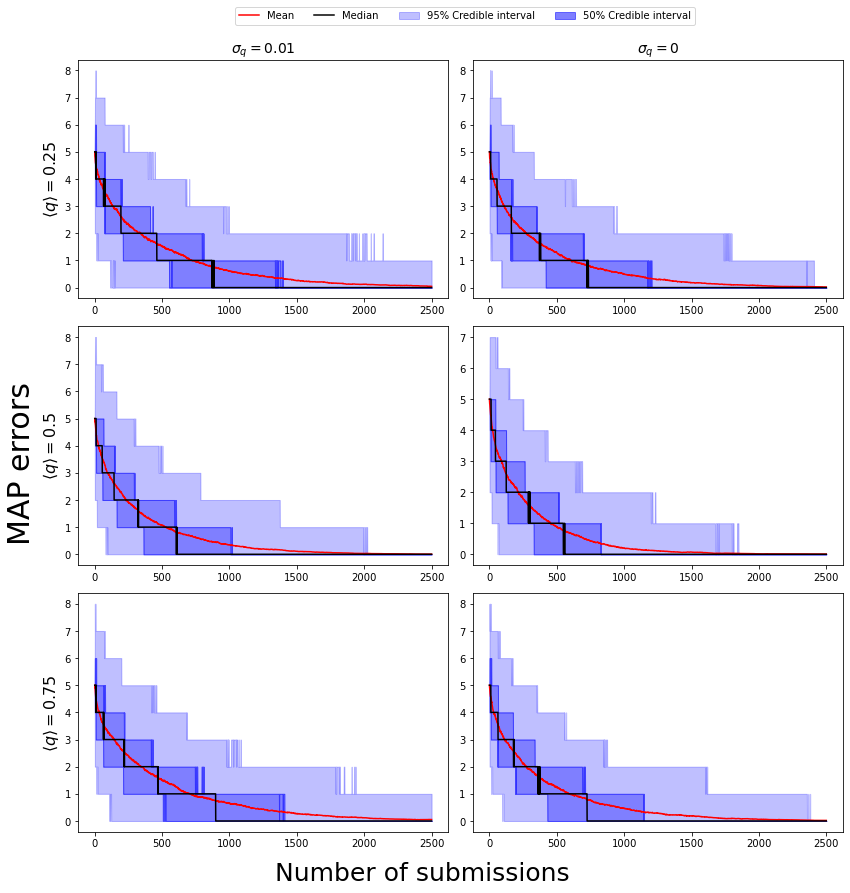

In [15]:
fig,ax=plt.subplots(3,2,figsize=(6*2,4*3))

label_mark = True
for (row,axi,gl_line) in zip(rows,ax,del_tables):
    for (axj,gl) in zip(axi,gl_line):
        mp = pd.read_csv('map_{}.csv'.format(gl.suffix))
        plot_confidence(axj,*get_confidence(mp),label=label_mark)
        label_mark = False
    axi[0].set_ylabel(r'$\langle q \rangle={}$'.format(row),size=16)
for (col,axi,gl) in zip(del_cols,ax[0],del_tables[0]):
    axi.set_title(r'$\sigma_q={}$'.format(col),size=14)

fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'MAP errors'.format(gl.model_name),size=30)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=25)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('map_delta_comparison.png',dpi=300,bbox_inches="tight")

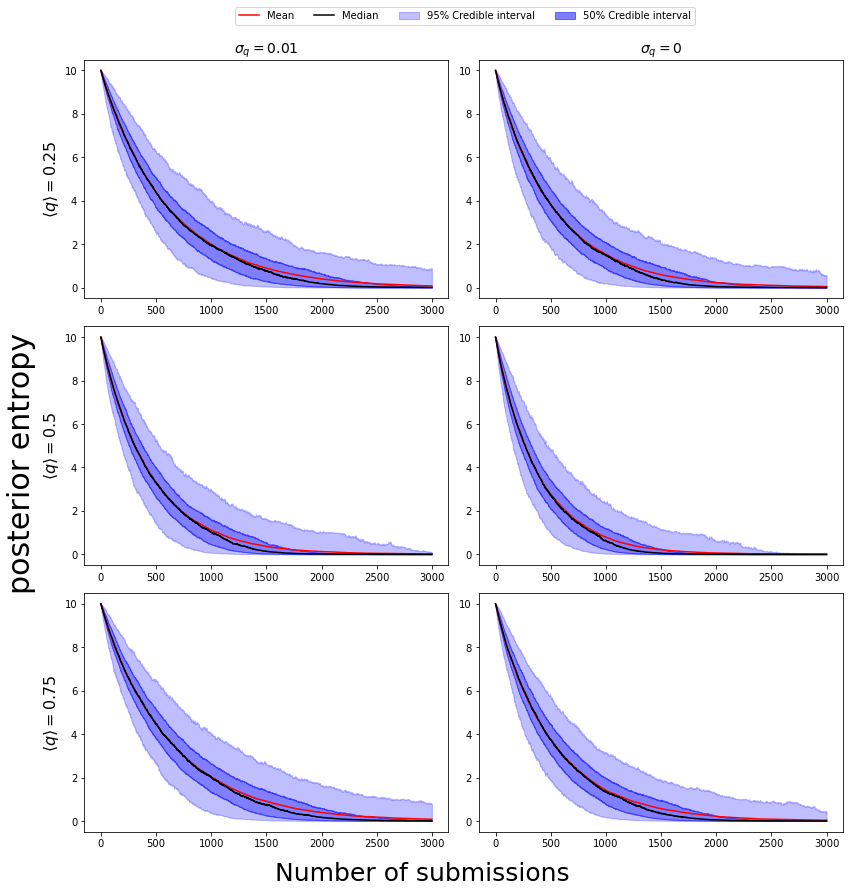

In [16]:
fig,ax=plt.subplots(3,2,figsize=(6*2,4*3))

label_mark=True
for (row,axi,gl_line) in zip(rows,ax,del_tables):
    for (axj,gl) in zip(axi,gl_line):
        S = pd.read_csv('entropy_{}.csv'.format(gl.suffix))
        plot_confidence(axj,*get_confidence(S),label=label_mark)
        label_mark= False
    axi[0].set_ylabel(r'$\langle q \rangle={}$'.format(row),size=16)
for (col,axi,gl) in zip(del_cols,ax[0],q_tables[0]):
    axi.set_title(r'$\sigma_q={}$'.format(col),size=14)

fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'posterior entropy'.format(gl.model_name),size=30)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=25)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('entropy_delta_comparison.png',dpi=300,bbox_inches="tight")

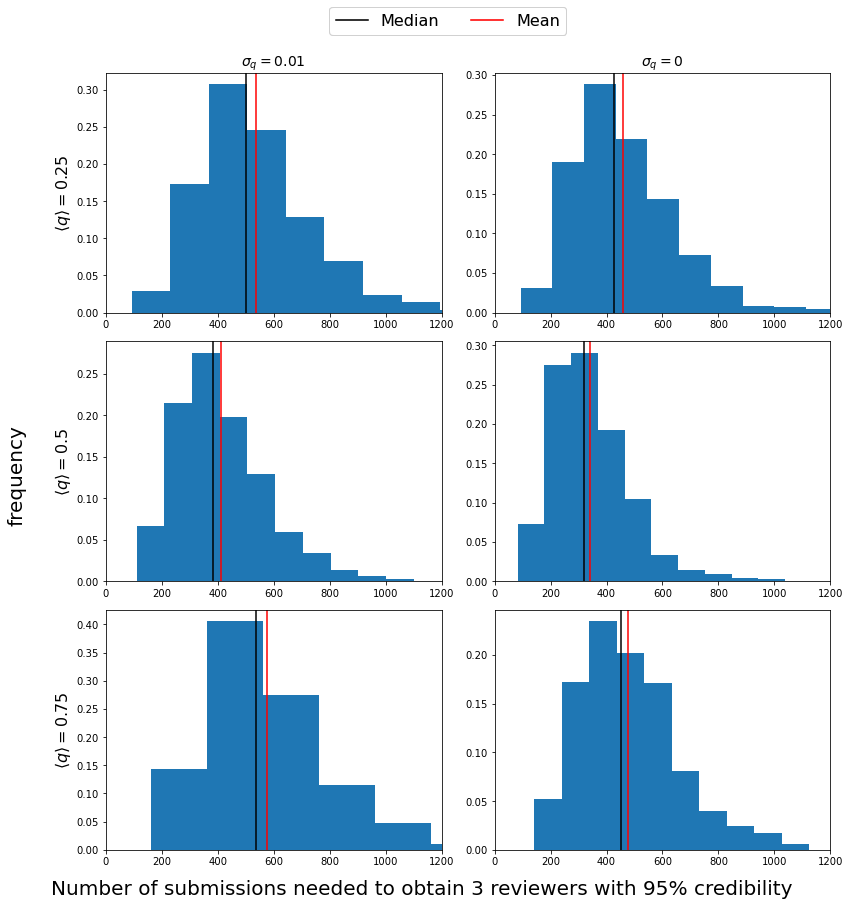

In [17]:
fig,ax=plt.subplots(3,2,figsize=(6*2,4*3))

label_mark=True
for (row,axi,gl_line) in zip(rows,ax,del_tables):
    for (axj,gl) in zip(axi,gl_line):
        #arr=7
        dferr = pd.read_csv('prob3_errors_{}.csv'.format(gl.suffix))
        p3nums = dferr['number'].to_numpy()
    
        axj.hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
        if label_mark:
            axj.axvline(np.median(p3nums),color='k',label='Median')
            axj.axvline(np.mean(p3nums),color='r',label='Mean')            
        else:
            axj.axvline(np.median(p3nums),color='k')
            axj.axvline(np.mean(p3nums),color='r')
        label_mark=False
        axj.set_xlim(0,1200)
    axi[0].set_ylabel(r'$\langle q \rangle={}$'.format(row),size=16)
        
for (col,axi,gl) in zip(del_cols,ax[0],q_tables[0]):
    axi.set_title(r'$\sigma_q={}$'.format(col),size=14)

    fig.legend(loc=8,ncol=4,bbox_to_anchor=(.53,1.001),fontsize=16)
fig.supylabel('frequency\n '.format(gl.model_name),size=20)
fig.supxlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility'.format(gl.model_name),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('p3_delta_comparison.png',dpi=150,bbox_inches="tight")

**SI E**

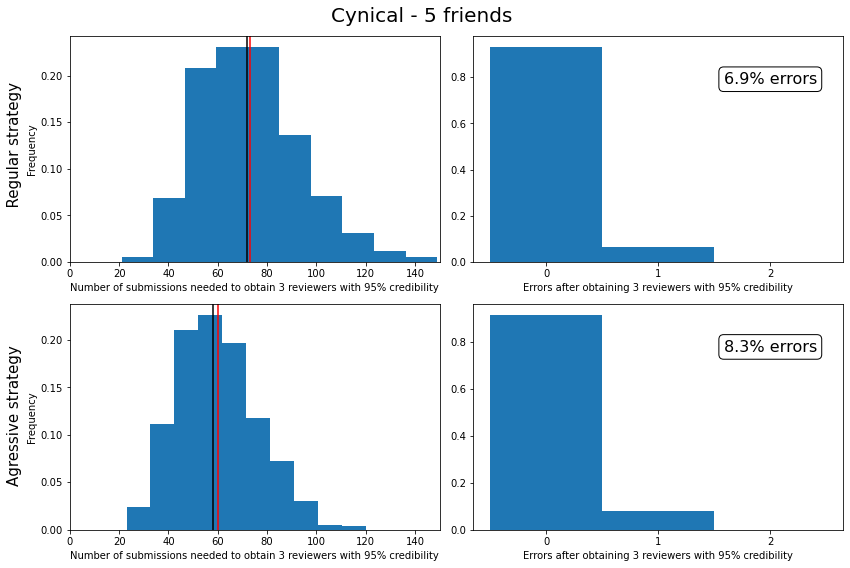

In [18]:
gl= params(10,5,3,'c')

fig,ax=plt.subplots(2,2,figsize=(12,8))
label_mark=True
   
dferr = pd.read_csv('prob3_errors_{}.csv'.format(gl.suffix))
p3nums = dferr['number'].to_numpy()
ax[0][0].hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
ax[0][0].axvline(np.median(p3nums),color='k',label='Median')
ax[0][0].axvline(np.mean(p3nums),color='r',label='Mean')
ax[0][0].set_xlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility')
ax[0][0].set_ylabel('Frequency')
ax[0][0].set_xlim(0,150)
    
errors = dferr['errors'].to_numpy()
counts,bins,void = ax[0][1].hist(errors,weights=np.ones_like(errors)/errors.size,bins=np.arange(4)-1/2)
ax[0][1].set_xlabel('Errors after obtaining 3 reviewers with 95% credibility')
#ax[0][1].set_ylabel('Frequency')
ax[0][1].annotate(str(np.round(100*(1-counts[0]),1))+'% errors', xy=(2,.85*counts.max()), xycoords="data",
                  va="center", ha="center", fontsize=16,
                  bbox=dict(boxstyle="round", fc="w"))
ax[0][1].set_xticks(np.arange(3))

dferr = pd.read_csv('agressive_prob3_errors_{}.csv'.format(gl.suffix))
p3nums = dferr['number'].to_numpy()
ax[1][0].hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
ax[1][0].axvline(np.median(p3nums),color='k',label='Median')
ax[1][0].axvline(np.mean(p3nums),color='r',label='Mean')
ax[1][0].set_xlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility')
ax[1][0].set_ylabel('Frequency')
ax[1][0].set_xlim(0,150)
    
errors = dferr['errors'].to_numpy()
counts,bins,void = ax[1][1].hist(errors,weights=np.ones_like(errors)/errors.size,bins=np.arange(4)-1/2)
ax[1][1].set_xlabel('Errors after obtaining 3 reviewers with 95% credibility')
#ax[1][1].set_ylabel('Frequency')
ax[1][1].annotate(str(np.round(100*(1-counts[0]),1))+'% errors', xy=(2,.85*counts.max()), xycoords="data",
                  va="center", ha="center", fontsize=16,
                  bbox=dict(boxstyle="round", fc="w"))
ax[1][1].set_xticks(np.arange(3))

fig.supylabel('Agressive strategy                             Regular strategy',size=15)

fig.suptitle(r'{} - {} friends'.format(gl.model_name,gl.ground.sum()).capitalize(),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('p3_errors_agressive_{}_{}friends.png'.format(gl.model_name,gl.ground.sum()),dpi=150,bbox_inches="tight")

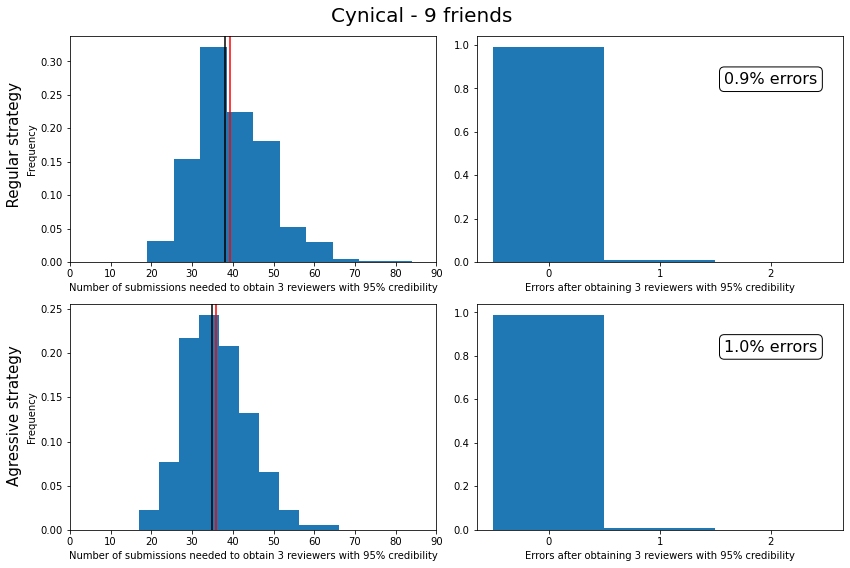

In [19]:
gl= params(10,9,3,'c')

fig,ax=plt.subplots(2,2,figsize=(12,8))
label_mark=True
   
dferr = pd.read_csv('prob3_errors_{}.csv'.format(gl.suffix))
p3nums = dferr['number'].to_numpy()
ax[0][0].hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
ax[0][0].axvline(np.median(p3nums),color='k',label='Median')
ax[0][0].axvline(np.mean(p3nums),color='r',label='Mean')
ax[0][0].set_xlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility')
ax[0][0].set_ylabel('Frequency')
ax[0][0].set_xlim(0,90)
    
errors = dferr['errors'].to_numpy()
counts,bins,void = ax[0][1].hist(errors,weights=np.ones_like(errors)/errors.size,bins=np.arange(4)-1/2)
ax[0][1].set_xlabel('Errors after obtaining 3 reviewers with 95% credibility')
#ax[0][1].set_ylabel('Frequency')
ax[0][1].annotate(str(np.round(100*(1-counts[0]),1))+'% errors', xy=(2,.85*counts.max()), xycoords="data",
                  va="center", ha="center", fontsize=16,
                  bbox=dict(boxstyle="round", fc="w"))
ax[0][1].set_xticks(np.arange(3))

dferr = pd.read_csv('agressive_prob3_errors_{}.csv'.format(gl.suffix))
p3nums = dferr['number'].to_numpy()
ax[1][0].hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
ax[1][0].axvline(np.median(p3nums),color='k',label='Median')
ax[1][0].axvline(np.mean(p3nums),color='r',label='Mean')
ax[1][0].set_xlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility')
ax[1][0].set_ylabel('Frequency')
ax[1][0].set_xlim(0,90)
    
errors = dferr['errors'].to_numpy()
counts,bins,void = ax[1][1].hist(errors,weights=np.ones_like(errors)/errors.size,bins=np.arange(4)-1/2)
ax[1][1].set_xlabel('Errors after obtaining 3 reviewers with 95% credibility')
#ax[1][1].set_ylabel('Frequency')
ax[1][1].annotate(str(np.round(100*(1-counts[0]),1))+'% errors', xy=(2,.85*counts.max()), xycoords="data",
                  va="center", ha="center", fontsize=16,
                  bbox=dict(boxstyle="round", fc="w"))
ax[1][1].set_xticks(np.arange(3))

fig.supylabel('Agressive strategy                             Regular strategy',size=15)

fig.suptitle(r'{} - {} friends'.format(gl.model_name,gl.ground.sum()).capitalize(),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('p3_errors_agressive_{}_{}friends.png'.format(gl.model_name,gl.ground.sum()),dpi=150,bbox_inches="tight")

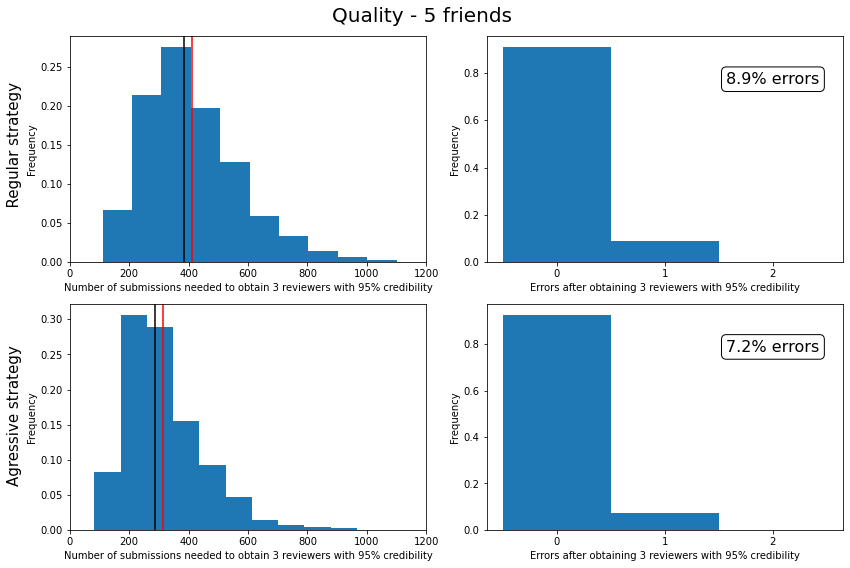

In [20]:
gl= params(10,5,3,'q')

fig,ax=plt.subplots(2,2,figsize=(12,8))
label_mark=True
   
dferr = pd.read_csv('prob3_errors_{}.csv'.format(gl.suffix))
p3nums = dferr['number'].to_numpy()
ax[0][0].hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
ax[0][0].axvline(np.median(p3nums),color='k',label='Median')
ax[0][0].axvline(np.mean(p3nums),color='r',label='Mean')
ax[0][0].set_xlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility')
ax[0][0].set_ylabel('Frequency')
ax[0][0].set_xlim(0,1200)
    
errors = dferr['errors'].to_numpy()
counts,bins,void = ax[0][1].hist(errors,weights=np.ones_like(errors)/errors.size,bins=np.arange(4)-1/2)
ax[0][1].set_xlabel('Errors after obtaining 3 reviewers with 95% credibility')
ax[0][1].set_ylabel('Frequency')
ax[0][1].annotate(str(np.round(100*(1-counts[0]),1))+'% errors', xy=(2,.85*counts.max()), xycoords="data",
                  va="center", ha="center", fontsize=16,
                  bbox=dict(boxstyle="round", fc="w"))
ax[0][1].set_xticks(np.arange(3))

dferr = pd.read_csv('agressive_prob3_errors_{}.csv'.format(gl.suffix))
p3nums = dferr['number'].to_numpy()
ax[1][0].hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
ax[1][0].axvline(np.median(p3nums),color='k',label='Median')
ax[1][0].axvline(np.mean(p3nums),color='r',label='Mean')
ax[1][0].set_xlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility')
ax[1][0].set_ylabel('Frequency')
ax[1][0].set_xlim(0,1200)
    
errors = dferr['errors'].to_numpy()
counts,bins,void = ax[1][1].hist(errors,weights=np.ones_like(errors)/errors.size,bins=np.arange(4)-1/2)
ax[1][1].set_xlabel('Errors after obtaining 3 reviewers with 95% credibility')
ax[1][1].set_ylabel('Frequency')
ax[1][1].annotate(str(np.round(100*(1-counts[0]),1))+'% errors', xy=(2,.85*counts.max()), xycoords="data",
                  va="center", ha="center", fontsize=16,
                  bbox=dict(boxstyle="round", fc="w"))
ax[1][1].set_xticks(np.arange(3))

fig.supylabel('Agressive strategy                             Regular strategy',size=15)

fig.suptitle(r'{} - {} friends'.format(gl.model_name,gl.ground.sum()).capitalize(),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('p3_errors_agressive_{}_{}friends.png'.format(gl.model_name,gl.ground.sum()),dpi=150,bbox_inches="tight")

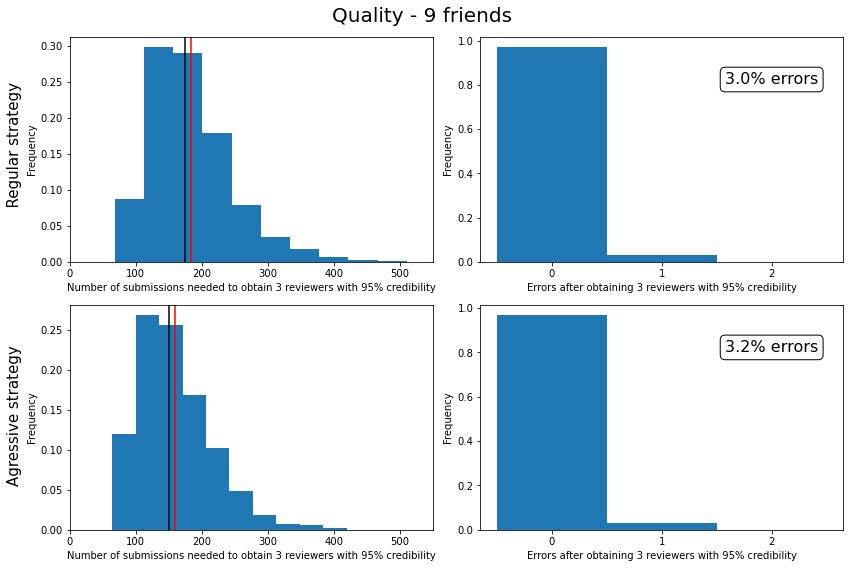

In [21]:
gl= params(10,9,3,'q')

fig,ax=plt.subplots(2,2,figsize=(12,8))
label_mark=True
   
dferr = pd.read_csv('prob3_errors_{}.csv'.format(gl.suffix))
p3nums = dferr['number'].to_numpy()
ax[0][0].hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
ax[0][0].axvline(np.median(p3nums),color='k',label='Median')
ax[0][0].axvline(np.mean(p3nums),color='r',label='Mean')
ax[0][0].set_xlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility')
ax[0][0].set_ylabel('Frequency')
ax[0][0].set_xlim(0,550)
    
errors = dferr['errors'].to_numpy()
counts,bins,void = ax[0][1].hist(errors,weights=np.ones_like(errors)/errors.size,bins=np.arange(4)-1/2)
ax[0][1].set_xlabel('Errors after obtaining 3 reviewers with 95% credibility')
ax[0][1].set_ylabel('Frequency')
ax[0][1].annotate(str(np.round(100*(1-counts[0]),1))+'% errors', xy=(2,.85*counts.max()), xycoords="data",
                  va="center", ha="center", fontsize=16,
                  bbox=dict(boxstyle="round", fc="w"))
ax[0][1].set_xticks(np.arange(3))

dferr = pd.read_csv('agressive_prob3_errors_{}.csv'.format(gl.suffix))
p3nums = dferr['number'].to_numpy()
ax[1][0].hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
ax[1][0].axvline(np.median(p3nums),color='k',label='Median')
ax[1][0].axvline(np.mean(p3nums),color='r',label='Mean')
ax[1][0].set_xlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility')
ax[1][0].set_ylabel('Frequency')
ax[1][0].set_xlim(0,550)
    
errors = dferr['errors'].to_numpy()
counts,bins,void = ax[1][1].hist(errors,weights=np.ones_like(errors)/errors.size,bins=np.arange(4)-1/2)
ax[1][1].set_xlabel('Errors after obtaining 3 reviewers with 95% credibility')
ax[1][1].set_ylabel('Frequency')
ax[1][1].annotate(str(np.round(100*(1-counts[0]),1))+'% errors', xy=(2,.85*counts.max()), xycoords="data",
                  va="center", ha="center", fontsize=16,
                  bbox=dict(boxstyle="round", fc="w"))
ax[1][1].set_xticks(np.arange(3))

fig.supylabel('Agressive strategy                             Regular strategy',size=15)

fig.suptitle(r'{} - {} friends'.format(gl.model_name,gl.ground.sum()).capitalize(),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('p3_errors_agressive_{}_{}friends.png'.format(gl.model_name,gl.ground.sum()),dpi=150,bbox_inches="tight")